# Importing Module

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.columns

Index(['User_ID', 'Description', 'Browser_Used', 'Device_Used', 'Is_Response'], dtype='object')

In [6]:
df['Is_Response'][2]

'not happy'

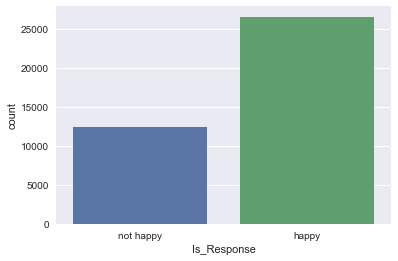

In [4]:
sns.countplot(x='Is_Response',data=df)

# Preprocessing 

In [6]:
from nltk.corpus import stopwords,wordnet as wn
from nltk.tokenize import wordpunct_tokenize,sent_tokenize
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
import re

In [140]:
def rem_punt(doc):
    ans = re.sub('"|\\n|\(|\)|,|\.|[$!--+@#]',' ',doc)
    ans = re.sub(' +',' ',ans)
    ans = ans.lower()
    return ans

In [142]:
df['RmNoise'] = df['Description'].apply(rem_punt)

In [144]:
def tokenize(document): 
    lemmy = []
    for sent in sent_tokenize(document):
        for token, tag in pos_tag(wordpunct_tokenize(sent)):
            #print(token,tag)
            if token in stop_word:
                 continue
            lemma = lemmatize(token, tag)
            lemmy.append(lemma)
    return lemmy

def lemmatize(token, tag):
    tag = {
          'N': wn.NOUN,
          'V': wn.VERB,
          'R': wn.ADV,
          'J': wn.ADJ
    }.get(tag[0], wn.NOUN)
    lemmatizer = WordNetLemmatizer()
    return lemmatizer.lemmatize(token, tag)

In [145]:
df['Lemmitize'] = df['RmNoise'].apply(tokenize)

In [147]:
df.to_csv('train_lem.csv',index=False)

In [6]:
df = pd.read_csv('Script2data.csv')
df['Lemmatization'][2]
df

,User_ID,Description,Browser_Used,Device_Used,Is_Response,Replacement,Lemmatization
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy,"['room', 'kind', 'clean', 'strong', 'smell', '...","['room', 'kind', 'clean', 'strong', 'smell', '..."
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy,"['stayed', 'crown', 'plaza', 'april', 'april',...","['stay', 'crown', 'plaza', 'april', 'april', '..."
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy,"['booked', 'hotel', 'hotwire', 'lowest', 'pric...","['booked', 'hotel', 'hotwire', 'low', 'price',..."
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy,"['stayed', 'husband', 'sons', 'way', 'alaska',...","['stayed', 'husband', 'son', 'way', 'alaska', ..."
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy,"['girlfriends', 'stayed', 'celebrate', 'th', '...","['girlfriend', 'stay', 'celebrate', 'th', 'bir..."
5,id10331,We had - rooms. One was very nice and clearly ...,InternetExplorer,Desktop,happy,"['rooms', 'one', 'nice', 'clearly', 'updated',...","['room', 'one', 'nice', 'clearly', 'update', '..."
6,id10332,My husband and I have stayed in this hotel a f...,Firefox,Tablet,not happy,"['husband', 'stayed', 'hotel', 'times', 'thoug...","['husband', 'stay', 'hotel', 'time', 'though',..."
7,id10333,My wife & I stayed in this glorious city a whi...,Google Chrome,Mobile,happy,"['wife', 'stayed', 'glorious', 'city', 'back',...","['wife', 'stay', 'glorious', 'city', 'back', '..."
8,id10334,My boyfriend and I stayed at the Fairmont on a...,Internet Explorer,Desktop,happy,"['boyfriend', 'stayed', 'fairmont', 'recent', ...","['boyfriend', 'stay', 'fairmont', 'recent', 't..."
9,id10335,"Wonderful staff, great location, but it was de...",Chrome,Tablet,not happy,"['wonderful', 'staff', 'great', 'location', 'd...","['wonderful', 'staff', 'great', 'location', 'd..."


# Statistical Modeling 

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer,LabelEncoder
from sklearn.metrics import accuracy_score,classification_report

In [9]:
X = df.iloc[: ,[0,1,6]]
y = df.iloc[:,4]
lab_y = LabelEncoder()
y = lab_y.fit_transform(y)

In [10]:
X_train,X_text,y_train,y_text = train_test_split(X,y,test_size = 0.1)

In [11]:
vect = TfidfVectorizer(max_df=1.0, max_features=15000, min_df=0.02, use_idf=True , ngram_range=(1,3))

In [7]:
#svd = TruncatedSVD(200,n_iter=7, random_state=42)
#lsa = make_pipeline(vect,svd, Normalizer(copy=False))

# For test data

In [21]:
df_test = pd.read_csv('Script2test.csv')
Xt = df_test.iloc[: ,[0,1,5]]

# Xg boost

In [43]:
from xgboost.sklearn import XGBClassifier
model = XGBClassifier(nthread=4,n_estimators=1000)

# Navie Bayes

In [108]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
model = GaussianNB()

# ExtraTree Classifier

In [12]:
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
model = RandomForestClassifier(n_estimators=600,n_jobs=-1)

# SVM Classifier


In [139]:
from sklearn.svm import SVC
model = SVC()

# Logistic Regression 

In [8]:
from sklearn.linear_model import LinearRegression,SGDClassifier,LogisticRegression
model = LogisticRegression()

# Model Fitting

In [13]:
clf = make_pipeline(vect,model)

In [15]:
clf.fit(X_train['Lemmatization'],y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=15000, min_df=0.02,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smoo...ators=600, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False))])

In [ ]:
y_pred = clf.predict(Xt['Lemmatization'])

In [17]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
accuracy_score(y_text,y_pred)

0.8341037493579867

In [29]:
Xt['Output'] = y_pred

/Users/coddict/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
def rep(val):
    if val == 1 :
        return "not happy"
    else :
        return "happy"

In [31]:
Xt['Is_Response'] = Xt['Output'].apply(rep)

/Users/coddict/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
sub = Xt.iloc[:,[0,4]]

In [33]:
sub.to_csv('Submission.csv',index=False)